In [1]:
import pandas as pd

# Use the pandas read_csv method to read the file
df = pd.read_csv('data01.csv')


In [2]:
df

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [96]:
pd.count(df['outcome'] == 0)

AttributeError: module 'pandas' has no attribute 'count'

In [4]:
summary = df.describe()
summary

# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

### Box plots

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot_cont(df, outcome_flag, feat, constrain=None):
    df0 = df

    if constrain == True:
        df0 = df0[df0[feat] <= df[feat].quantile(0.8)]
    sns.catplot(data=df0, x=outcome_flag, y=feat, kind='box')
    plt.show()

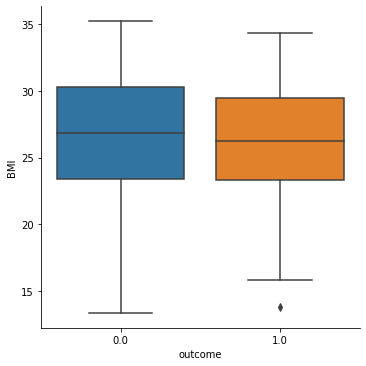

In [87]:
box_plot_cont(df=df, outcome_flag='outcome', feat='BMI', constrain=True)

### Histogram plots

In [45]:


def hist_plot_cont(df, outcome_flag, feat, bin_n=100, excl=None, rang=None, constrain=None):
    
    df0 = df
    
    if constrain == True:
        df0 = df[df0[feat] <= df[feat].quantile(0.95)]
    
    df1 = df0[df0[outcome_flag] == df0[outcome_flag].unique()[0]]
    df2 = df0[df0[outcome_flag] == df0[outcome_flag].unique()[1]]
    
    plt.figure(figsize=(15,5))
    sns.histplot(data=df1, x=feat, bins=bin_n, stat='count', alpha=0.3, color='g', kde=True)
    sns.histplot(data=df2, x=feat, bins=bin_n, stat='count', alpha=0.3, color='r', kde=True)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


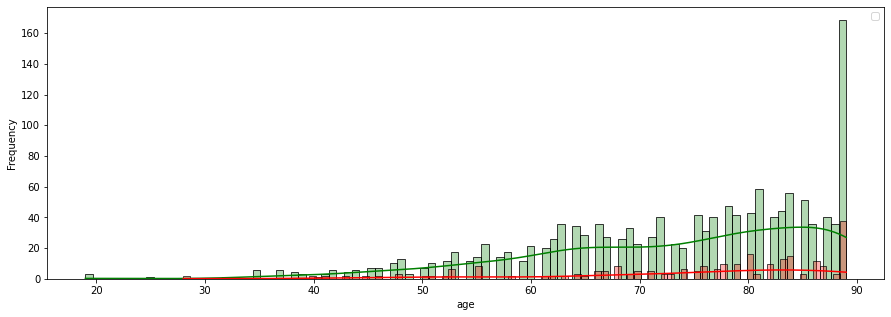

In [88]:
hist_plot_cont(df=df, outcome_flag='outcome', feat='age', constrain=True)

In [89]:
def bin_and_plot(dataframe, feature_col, outcome_col, alive_bar):
    # Bin the feature column into 10 equal-width bins
    bins = np.linspace(dataframe[feature_col].min(), dataframe[feature_col].max(), 10)
    dataframe['bin'] = pd.cut(dataframe[feature_col], bins)

    # Calculate the midpoint of each bin and add it to a new column
    dataframe['bin_mid'] = dataframe['bin'].apply(lambda x: x.mid)

    # Calculate the average outcome and count of rows for each bin
    grouped = dataframe.groupby('bin_mid')[outcome_col].agg(['mean', 'count'])
    count_zero = dataframe[dataframe[outcome_col] == 0].groupby('bin_mid')[outcome_col].count()

    # Plot the results
    fig, ax1 = plt.subplots()

    # Plot the line showing the average outcome
    ax1.plot(grouped.index, grouped['mean'], 'r-', linewidth=2, label='Average Deaths')
    ax1.set_xlabel(feature_col)
    ax1.set_ylabel('Average Outcome')

    if alive_bar == True:
        # Add a second line showing the count of 0s in the outcome column
        ax1.plot(count_zero.index, count_zero, 'g-', linewidth=2, label='Count of 0s')
        ax1.tick_params(axis='y', labelcolor='r')

    # Create a second axis for the histogram
    ax2 = ax1.twinx()

    # Plot the histogram showing the volume in each bin
    ax2.hist(dataframe[feature_col], bins=bins, alpha=0.5, color='b', label='Volume')
    ax2.tick_params(axis='y', labelcolor='b')

    # Set the title, legend, and show the plot
    title = 'Binned Data with Histograms: ' + feature_col
    ax1.set_title(title)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()


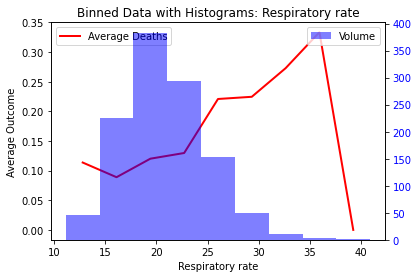

In [94]:
bin_and_plot(dataframe=df, feature_col='Respiratory rate', outcome_col='outcome', alive_bar=False)